In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Data cleaning

In [28]:
df = pd.read_csv("kc_house_data.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [29]:
# Đặc điểm vật lý của nhà:

# bedrooms: Số phòng ngủ
# bathrooms: Số phòng tắm (có thể là số thập phân, ví dụ: 2.5 = 2 phòng tắm đầy đủ + 1 phòng vệ sinh)
# sqft_living: Diện tích không gian sống bên trong (tính bằng feet vuông)
# sqft_lot: Diện tích lô đất (tính bằng feet vuông)
# floors: Số tầng của ngôi nhà
# sqft_above: Diện tích phần trên mặt đất (không bao gồm tầng hầm)
# sqft_basement: Diện tích tầng hầm

# Chất lượng và tình trạng:

# waterfront: Nhà có view/giáp mặt nước không (0 = không, 1 = có)
# view: Chất lượng tầm nhìn từ nhà (thang điểm từ 0-4)
# condition: Tình trạng tổng thể của ngôi nhà (thang điểm từ 1-5)
# grade: Mức độ xây dựng và thiết kế (thang điểm từ 1-13, dựa trên chất lượng vật liệu và thiết kế)

# Thông tin thời gian:

# yr_built: Năm xây dựng ngôi nhà
# yr_renovated: Năm cải tạo (0 nếu chưa từng được cải tạo)

# Vị trí địa lý:

# zipcode: Mã bưu chính
# lat: Vĩ độ
# long: Kinh độ

# Thông tin khu vực lân cận:

# sqft_living15: Diện tích trung bình không gian sống của 15 căn nhà gần nhất
# sqft_lot15: Diện tích trung bình lô đất của 15 căn nhà gần nhất

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [31]:
df.drop(columns=["id", "date", "zipcode"], inplace=True)

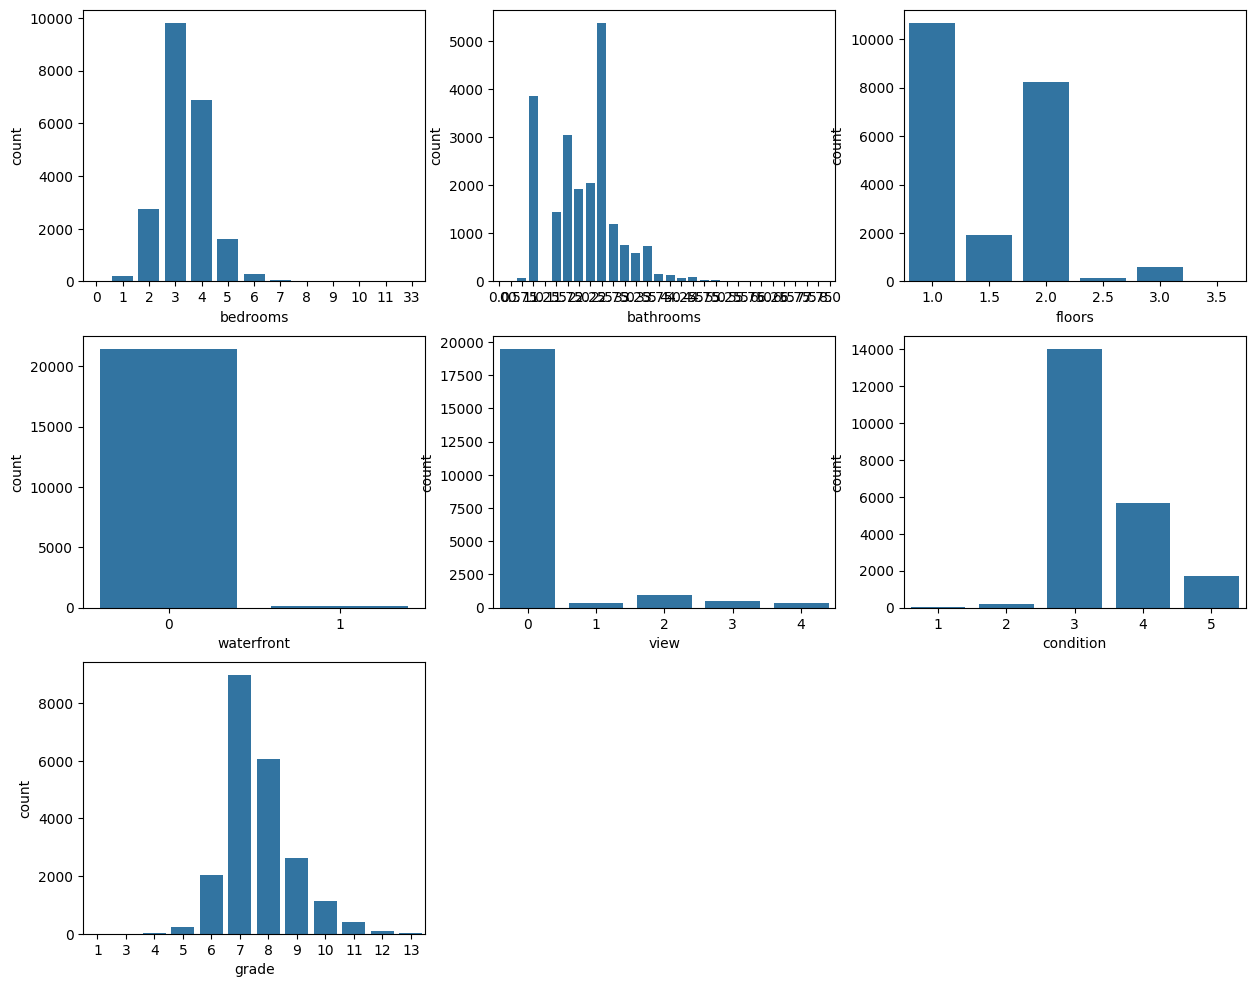

In [32]:
categories_columns = ["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade"]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categories_columns):
    sns.countplot(data=df, x=col, ax=axes[i])

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

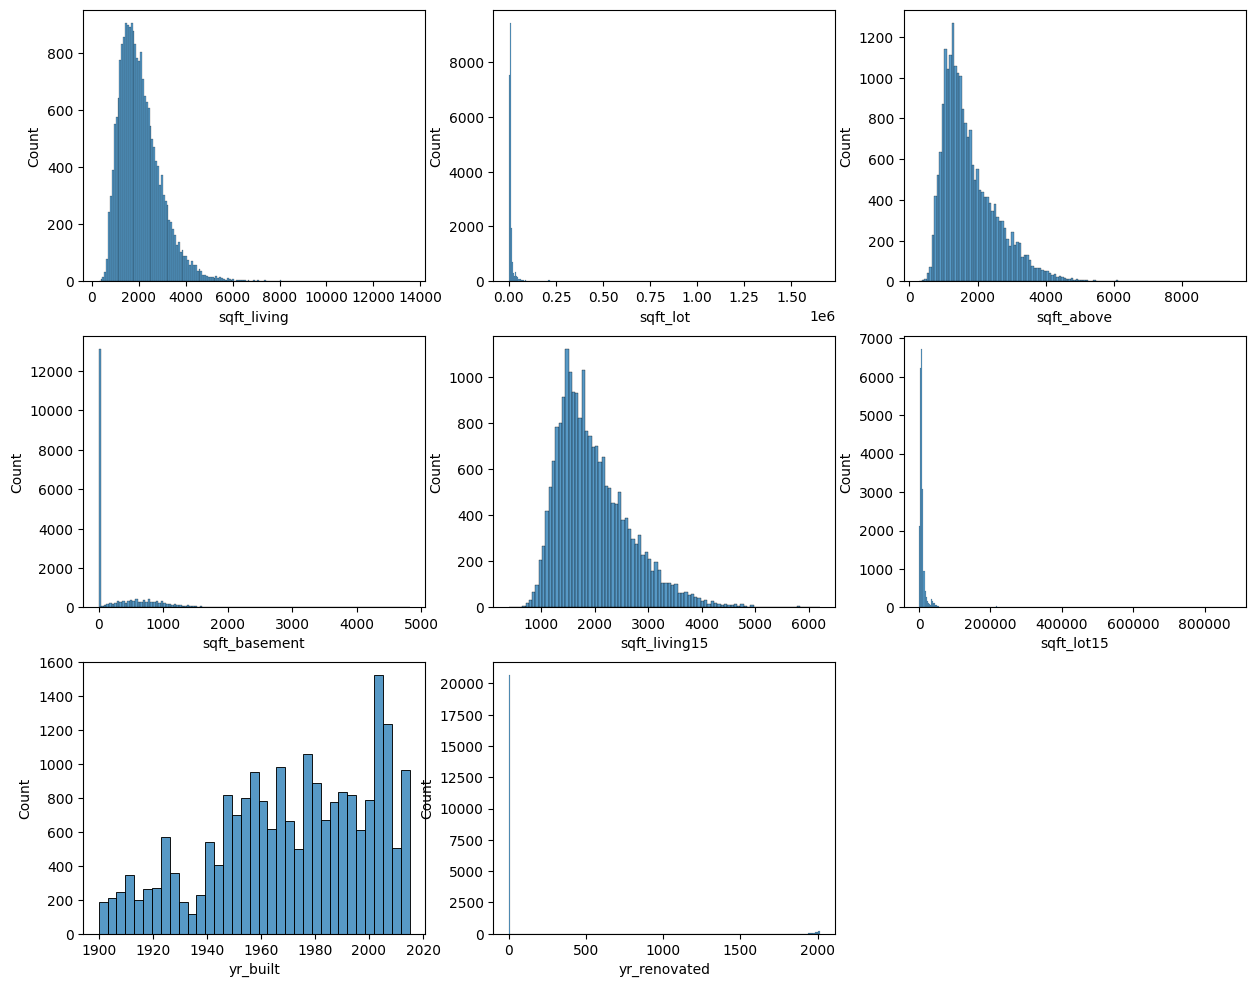

In [33]:
numerical_columns = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "yr_built", "yr_renovated"]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, ax=axes[i])

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# sqft_living: Diện tích không gian sống bên trong (tính bằng feet vuông)
# sqft_lot: Diện tích lô đất (tính bằng feet vuông)
# sqft_above: Diện tích phần trên mặt đất (không bao gồm tầng hầm)
# sqft_basement: Diện tích tầng hầm
# sqft_living15: Diện tích trung bình không gian sống của 15 căn nhà gần nhất
# sqft_lot15: Diện tích trung bình lô đất của 15 căn nhà gần nhất
# yr_built: Năm xây dựng ngôi nhà
# yr_renovated: Năm cải tạo (0 nếu chưa từng được cải tạo)

<Axes: xlabel='long', ylabel='lat'>

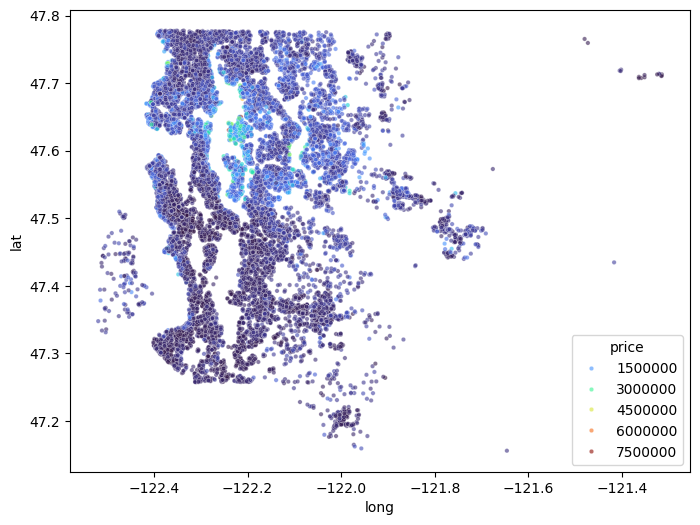

In [34]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x="long", y="lat", hue="price", 
                palette="turbo", alpha=0.6, s=10)

<Axes: >

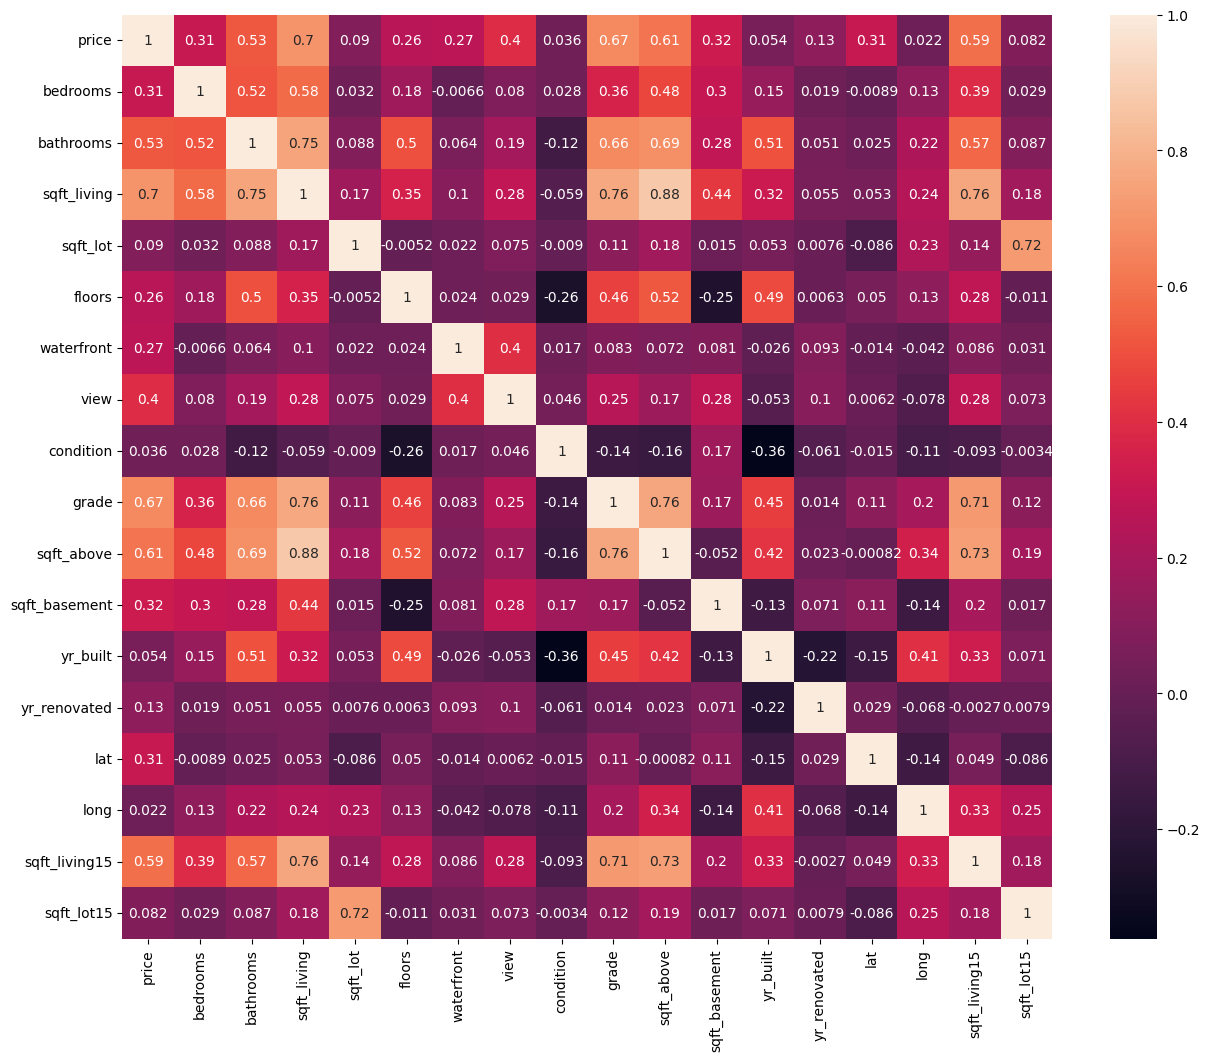

In [35]:
plt.figure(figsize=(15, 12))
sns.heatmap(data=df.corr(numeric_only=True), annot=True)

In [36]:
# Đặc điểm vật lý của nhà:

# bedrooms: Số phòng ngủ
# bathrooms: Số phòng tắm (có thể là số thập phân, ví dụ: 2.5 = 2 phòng tắm đầy đủ + 1 phòng vệ sinh)
# sqft_living: Diện tích không gian sống bên trong (tính bằng feet vuông)
# sqft_lot: Diện tích lô đất (tính bằng feet vuông)
# floors: Số tầng của ngôi nhà
# sqft_above: Diện tích phần trên mặt đất (không bao gồm tầng hầm)
# sqft_basement: Diện tích tầng hầm

# Chất lượng và tình trạng:

# waterfront: Nhà có view/giáp mặt nước không (0 = không, 1 = có)
# view: Chất lượng tầm nhìn từ nhà (thang điểm từ 0-4)
# condition: Tình trạng tổng thể của ngôi nhà (thang điểm từ 1-5)
# grade: Mức độ xây dựng và thiết kế (thang điểm từ 1-13, dựa trên chất lượng vật liệu và thiết kế)

# Thông tin thời gian:

# yr_built: Năm xây dựng ngôi nhà
# yr_renovated: Năm cải tạo (0 nếu chưa từng được cải tạo)

# Vị trí địa lý:

# zipcode: Mã bưu chính
# lat: Vĩ độ
# long: Kinh độ

# Thông tin khu vực lân cận:

# sqft_living15: Diện tích trung bình không gian sống của 15 căn nhà gần nhất
# sqft_lot15: Diện tích trung bình lô đất của 15 căn nhà gần nhất


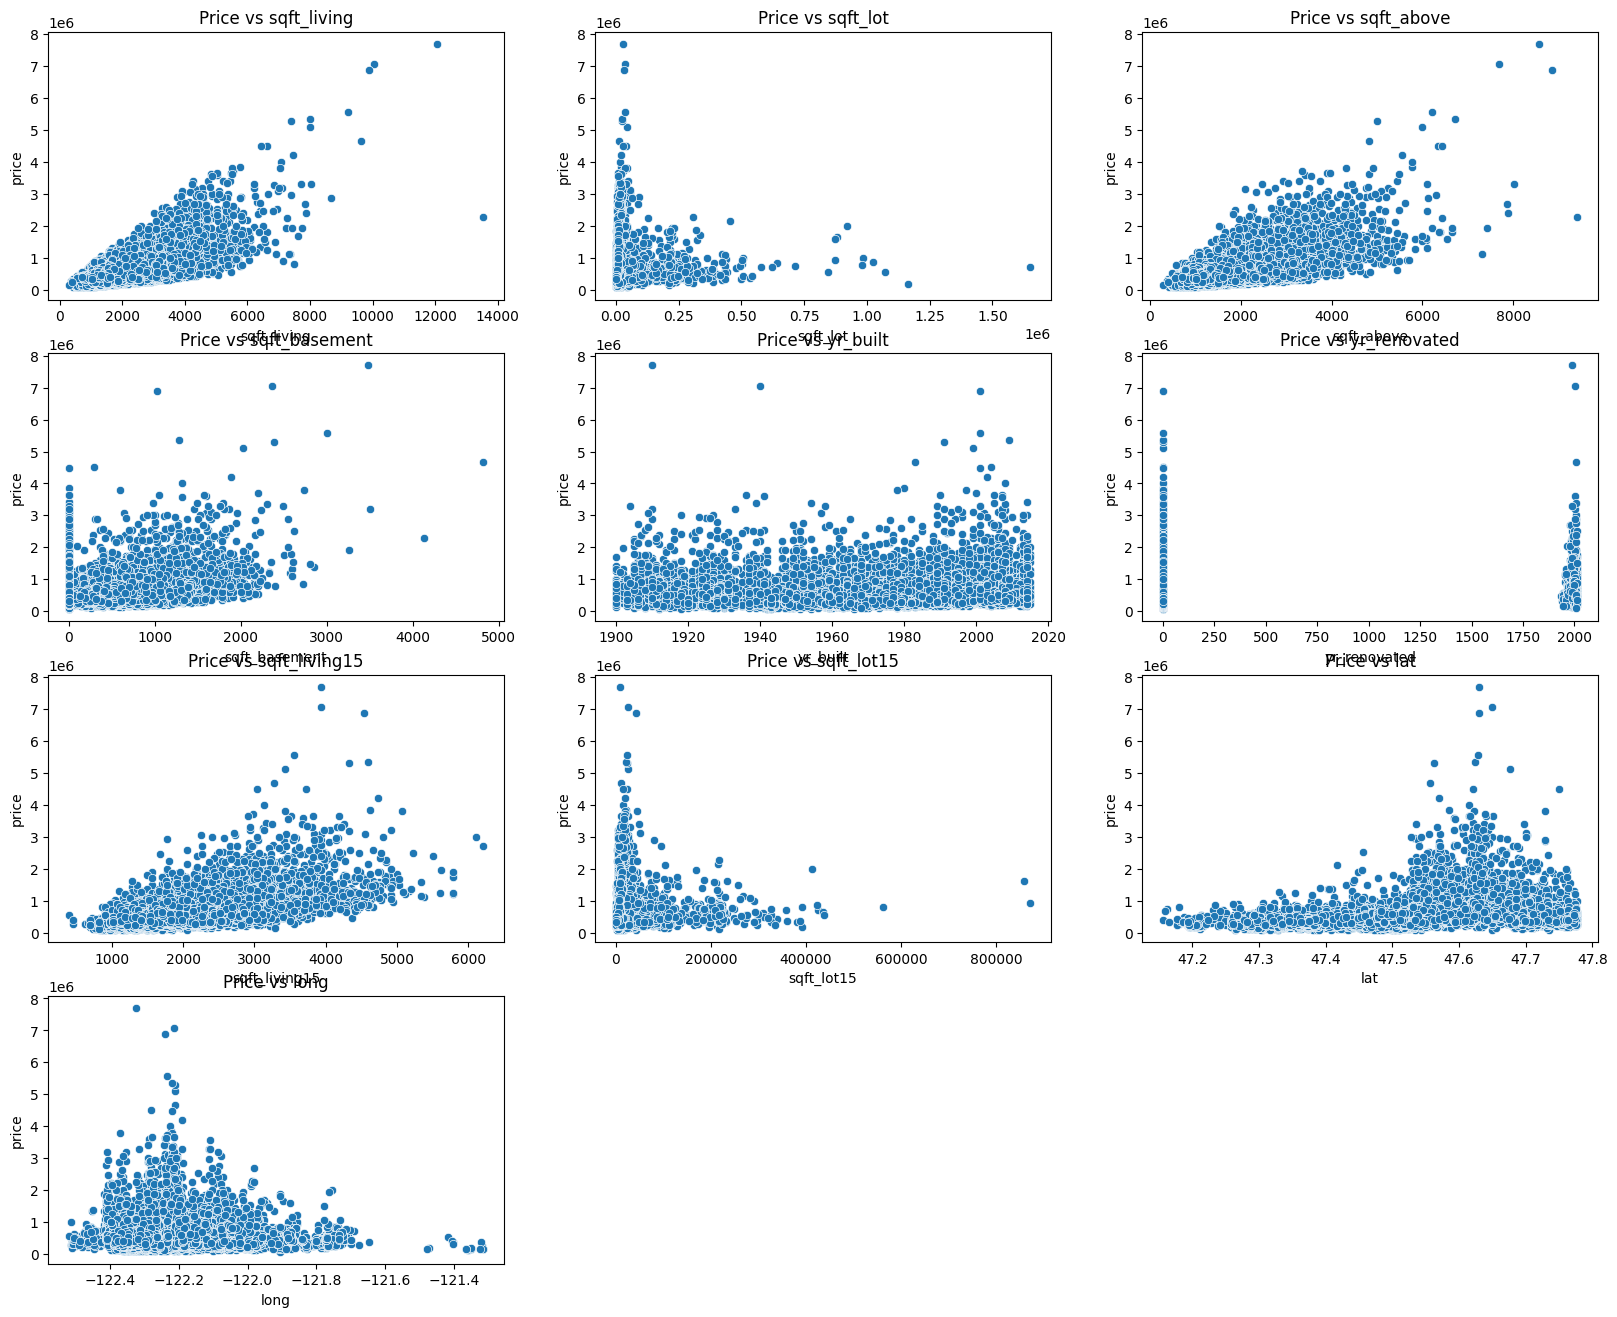

In [37]:
numerical = ["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15", "lat", "long"]
fig, axes = plt.subplots(4, 3, figsize = (20, 16))
axes = axes.flatten()

for i, col in enumerate(numerical):
    sns.scatterplot(df, x=col, y="price", ax=axes[i])
    axes[i].set_title(f"Price vs {col}")

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)



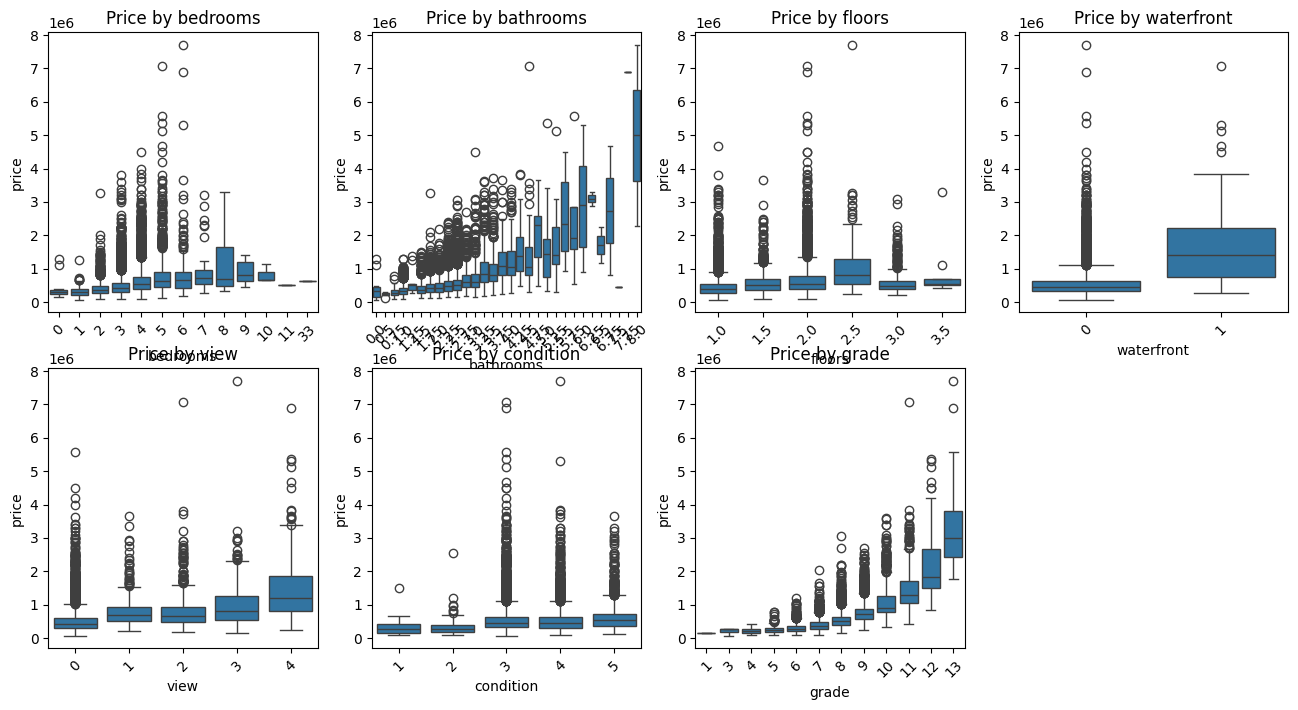

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

categories = ["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade"]

for i, col in enumerate(categories):
    sns.boxplot(data=df, x=col, y="price", ax=axes[i])
    axes[i].set_title(f"Price by {col}")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

In [39]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


### EDA

### Feature Engineering

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor, AdaBoostRegressor, StackingRegressor, ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor


#### Before processing

In [41]:
X = df.drop(columns=["price"])
y = df["price"]
print(X.shape, y.shape)

(21613, 17) (21613,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

# Tính các metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# In kết quả rõ ràng
print("Model Evaluation Metrics:")
print(f"MAE (Mean Absolute Error): ${mae:,.2f}")
print(f"MSE (Mean Squared Error): ${mse:,.2f}")
print(f"RMSE (Root Mean Squared Error): ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation Metrics:
MAE (Mean Absolute Error): $73,195.03
MSE (Mean Squared Error): $21,499,983,198.07
RMSE (Root Mean Squared Error): $146,628.73
R² Score: 0.8578


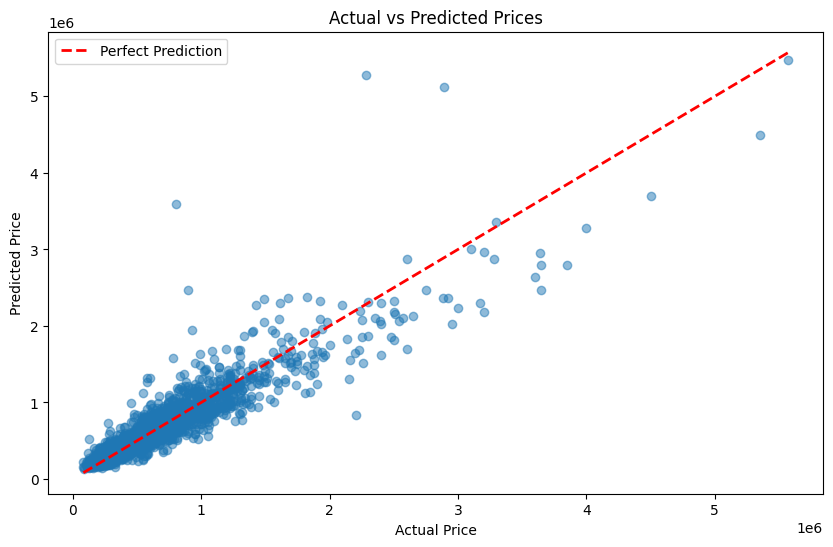

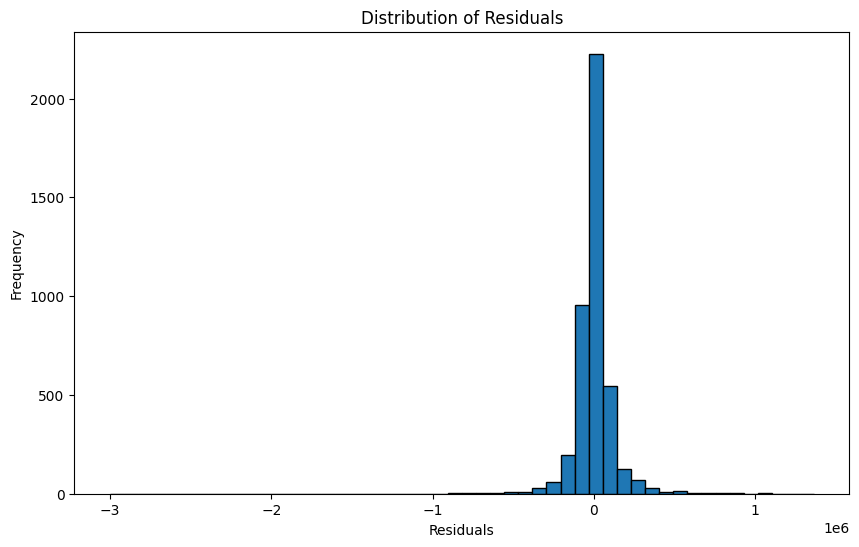

In [45]:
# So sánh giá thực tế vs dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# Phân phối residuals (sai số)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

#### After processing

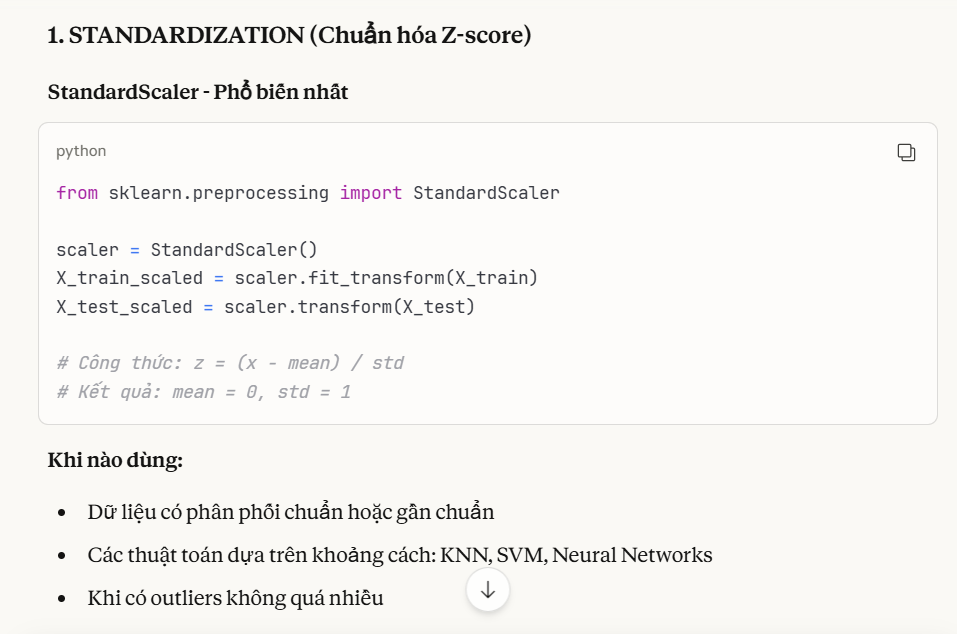
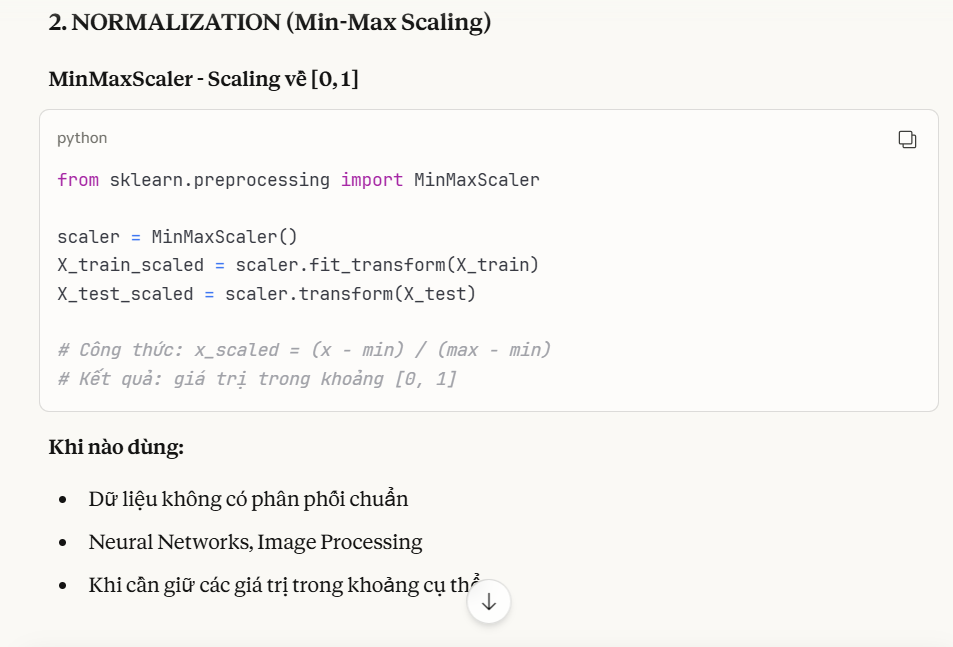
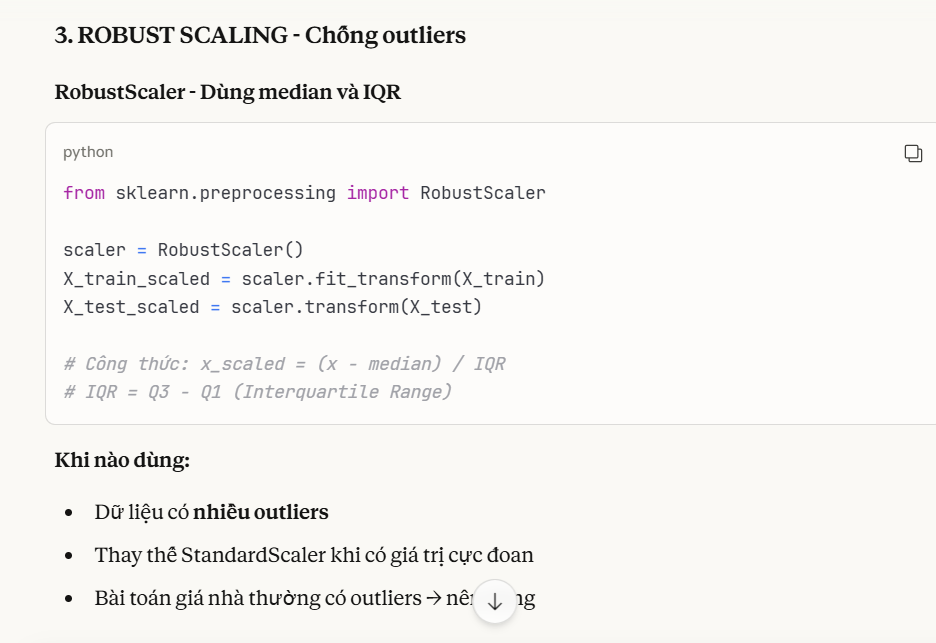

In [46]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,47.3670,-122.152,2750,13095
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,47.5520,-122.290,1270,5000
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,47.4838,-122.335,1170,7800
16970,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,47.3951,-122.172,1800,7350
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,47.7043,-122.209,2090,10454


In [48]:
num_cat_transformation = ColumnTransformer(
    [
        ("scaling", MinMaxScaler(), [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 15, 16])
    ], 
    remainder="passthrough"
)

In [55]:
def create_pipeline(algo):
    return Pipeline(
        [
            ('num_cat_transformation', num_cat_transformation),
            ('regression', algo)
        ]
    )

### Model traning

In [ ]:
algorithms = [
    # linear
    LinearRegression(),
    Ridge(),
    Lasso(),
    
    # tree
    ExtraTreeRegressor(),
    DecisionTreeRegressor(),

    # ensemble
    BaggingRegressor(),
    AdaBoostRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),

    # neighbors
    KNeighborsRegressor()

]

In [ ]:
model_names = []
CV_MAE = []  # Mean Absolute Error
CV_RMSE = []  # Root Mean Squared Error
CV_R2 = []  # R² Score

for algo in algorithms:
    pipeline = create_pipeline(algo)
    
    # Tính MAE (âm vì cross_val_score maximize, MAE minimize)
    mae_scores = cross_val_score(pipeline, X_train, y_train, 
                                  cv=5, scoring='neg_mean_absolute_error')
    
    # Tính RMSE
    rmse_scores = cross_val_score(pipeline, X_train, y_train, 
                                   cv=5, scoring='neg_root_mean_squared_error')
    
    # Tính R²
    r2_scores = cross_val_score(pipeline, X_train, y_train, 
                                 cv=5, scoring='r2')
    
    model_names.append(algo.__class__.__name__)
    CV_MAE.append(-mae_scores.mean())  # Đảo dấu về dương
    CV_RMSE.append(-rmse_scores.mean())  # Đảo dấu về dương
    CV_R2.append(r2_scores.mean())

# In kết quả
import pandas as pd
results = pd.DataFrame({
    'Model': model_names,
    'CV_MAE': CV_MAE,
    'CV_RMSE': CV_RMSE,
    'CV_R2': CV_R2
})

print(results.sort_values('CV_R2', ascending=False))

d:\relearnPython\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.088e+13, tolerance: 1.728e+11
  model = cd_fast.enet_coordinate_descent(
d:\relearnPython\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+14, tolerance: 1.795e+11
  model = cd_fast.enet_coordinate_descent(
d:\relearnPython\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e+13, tolerance: 1.807e

                       Model         CV_MAE        CV_RMSE     CV_R2
4      RandomForestRegressor   69849.554606  126649.629379  0.876880
5  GradientBoostingRegressor   78047.665525  132429.430491  0.865130
3      DecisionTreeRegressor  101028.471400  186219.528119  0.731514
2                      Lasso  125612.496027  199799.790994  0.693817
0           LinearRegression  125612.248711  199799.968105  0.693816
1                      Ridge  125382.032238  199834.031698  0.693730
6        KNeighborsRegressor  126447.743216  250314.182491  0.519116
